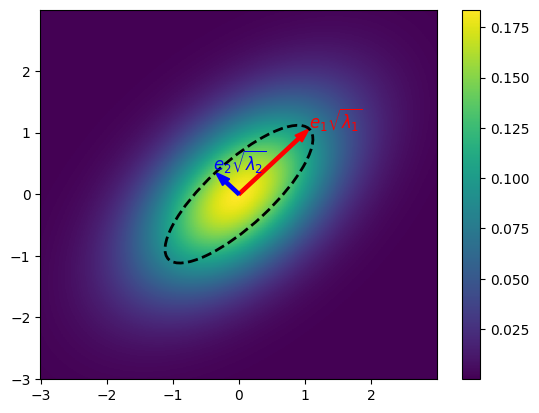

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse

# Define the mean and covariance matrix
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]

# Create a grid of points
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

# Create the multivariate normal distribution
rv = multivariate_normal(mean, cov)

# Calculate the eigenvectors and eigenvalues of the covariance matrix
w, v = np.linalg.eig(cov)

# Plot the distribution and eigenvectors/eigenvalues with labels and ellipse
fig = plt.figure()
ax = fig.add_subplot(111)
gradient = ax.pcolormesh(x, y, rv.pdf(pos), shading='auto', cmap='viridis')
# gradient = ax.pcolormesh(x, y, rv.pdf(pos), shading='auto', cmap='jet')
ax.arrow(mean[0], mean[1], v[0][0]*w[0], v[1][0]*w[0], color='red', width=0.05, length_includes_head=True)
ax.arrow(mean[0], mean[1], v[0][1]*w[1], v[1][1]*w[1], color='blue', width=0.05, length_includes_head=True)
ax.text(v[0][0]*w[0], v[1][0]*w[0], '$e_1\sqrt{\lambda_1}$', color='red', fontsize=12)
ax.text(v[0][1]*w[1]*1.1, v[1][1]*w[1]*1.1, '$e_2\sqrt{\lambda_2}$', color='blue', fontsize=12)

# Add a colorbar
cbar = plt.colorbar(gradient)

# Add an ellipse to the plot
ellipse = Ellipse((mean[0], mean[1]), w[0]*2, w[1]*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])))
ax.add_artist(ellipse)
ellipse.set_clip_box(ax.bbox)
ellipse.set_edgecolor('black')
ellipse.set_facecolor('none')
ellipse.set_linestyle('dashed')
ellipse.set_linewidth(2)

plt.show()

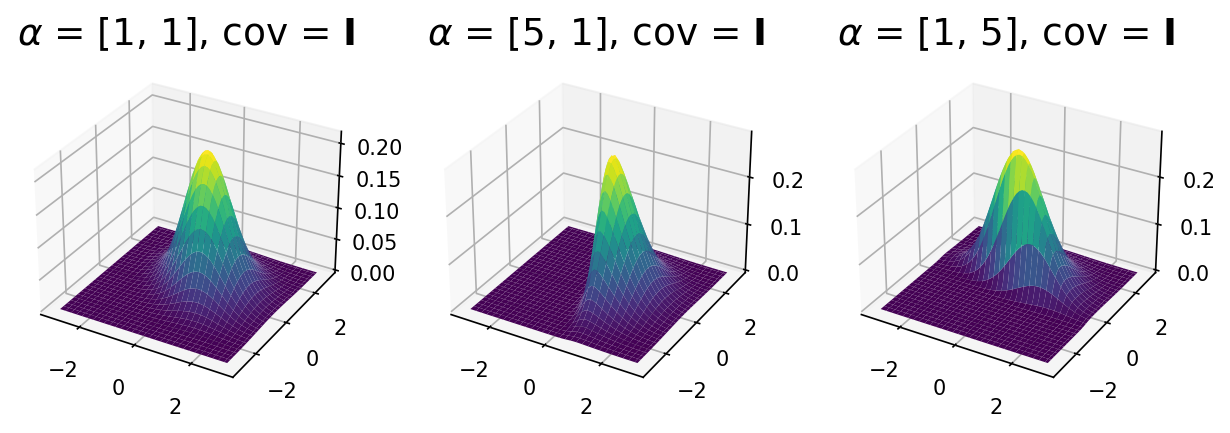

In [3]:
from   matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from   scipy.stats import (multivariate_normal as mvn,
                           norm)
from   scipy.stats._multivariate import _squeeze_output

class multivariate_skewnorm:
    
    def __init__(self, shape, cov=None):
        self.dim   = len(shape)
        self.shape = np.asarray(shape)
        self.mean  = np.zeros(self.dim)
        self.cov   = np.eye(self.dim) if cov is None else np.asarray(cov)

    def pdf(self, x):
        return np.exp(self.logpdf(x))
        
    def logpdf(self, x):
        x    = mvn._process_quantiles(x, self.dim)
        pdf  = mvn(self.mean, self.cov).logpdf(x)
        cdf  = norm(0, 1).logcdf(np.dot(x, self.shape))
        return _squeeze_output(np.log(2) + pdf + cdf)

xx   = np.linspace(-3, 3, 60)
yy   = np.linspace(-3, 3, 60)
X, Y = np.meshgrid(xx, yy)
pos  = np.dstack((X, Y))

fig  = plt.figure(figsize=(10, 10), dpi=150)
axes = [
    fig.add_subplot(1, 3, 1, projection='3d'),
    fig.add_subplot(1, 3, 2, projection='3d'),
    fig.add_subplot(1, 3, 3, projection='3d')
]

for a, ax in zip([[1, 1], [5, 1], [1, 5]], axes):
    Z = multivariate_skewnorm(shape=a).pdf(pos)
    ax.plot_surface(X, Y, Z, cmap=cm.viridis)
    ax.set_title(r'$\alpha$ = %s, cov = $\mathbf{I}$' % str(a), fontsize=18)

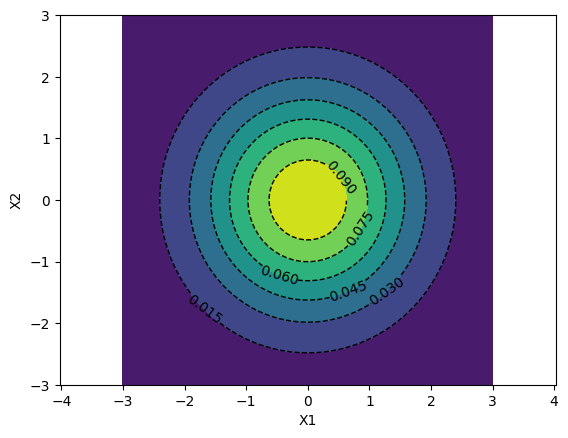

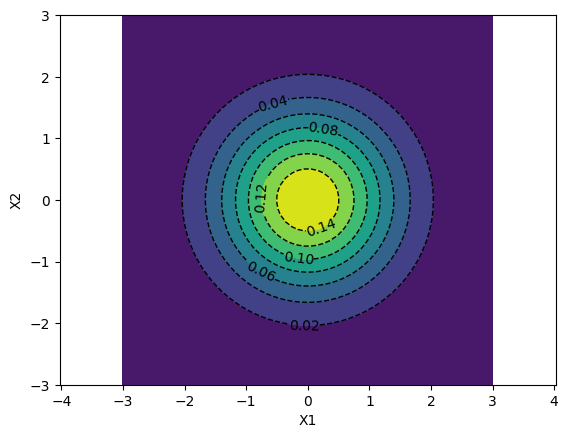

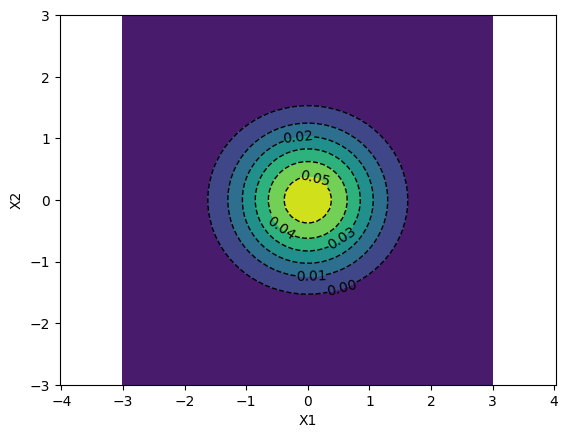

In [4]:
Z1 = multivariate_skewnorm(shape=[0.0,0.0], cov=[[1.5,0],[0,1.6]]).pdf(pos)

# plotly_plot_bivariate_normal_pdf(X, Y, Z)
cp = plt.contour(X, Y, Z1, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X, Y, Z1, )
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.show()

Z = multivariate_skewnorm(shape=[0,0], cov=[[1,0],[0,1]]).pdf(pos)

# plotly_plot_bivariate_normal_pdf(X, Y, Z)

cp = plt.contour(X, Y, Z, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X, Y, Z, )
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.show()


# G = abs(Z1-Z)
G = (Z-Z1)

cp = plt.contour(X, Y, G, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X, Y, G, )
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.show()